In [13]:
!pip install pandas numpy matplotlib seaborn


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


plt.rcParams['figure.figsize'] = (20,10)

In [15]:
df=pd.read_csv(r"C:\Users\piyus\Downloads\house_prediction\Model\bengaluru_house_prices.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [16]:
df.shape

(13320, 9)

In [17]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [18]:
df.groupby('location')['location'].agg('count')

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1305, dtype: int64

In [19]:
df1=df.drop(columns=['availability','society','balcony'])
df1

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [20]:
df1.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [21]:
df2=df1.dropna()
df2.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [22]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [23]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\piyus\AppData\Local\Temp\ipykernel_23884\4052967463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [24]:
df2


,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [25]:
df2

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [26]:
def is_float(x):
  try:
    float(x);
  except:
    return False
  return True

In [27]:
df2[~(df2.total_sqft.apply(is_float))].head(10)

,area_type,location,size,total_sqft,bath,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Super built-up Area,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Built-up Area,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Super built-up Area,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Built-up Area,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [28]:
df2.drop(columns=['size'],inplace=True)

C:\Users\piyus\AppData\Local\Temp\ipykernel_23884\2574235501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns=['size'],inplace=True)


In [29]:
df2

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453,4.0,231.00,5
13316,Super built-up Area,Richards Town,3600,5.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4689,4.0,488.00,4


In [30]:
df3=df2[~df2.total_sqft.apply(is_float)]

In [31]:
def convert_sqft_to_num(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [32]:
df2['total_sqft'].apply(convert_sqft_to_num).head(10)

0    1056.0
1    2600.0
2    1440.0
3    1521.0
4    1200.0
5    1170.0
6    2732.0
7    3300.0
8    1310.0
9    1020.0
Name: total_sqft, dtype: float64

In [33]:
df2

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453,4.0,231.00,5
13316,Super built-up Area,Richards Town,3600,5.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4689,4.0,488.00,4


In [34]:
df3['total_sqft'].apply(convert_sqft_to_num).head(10)

30     2475.0
122    5611.5
137    1073.5
165    1242.5
188    1277.5
410       NaN
549    1317.5
648       NaN
661    1132.5
672    4046.0
Name: total_sqft, dtype: float64

In [35]:
df4 = df2.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)

In [36]:
df4

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453.0,4.0,231.00,5
13316,Super built-up Area,Richards Town,3600.0,5.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4689.0,4.0,488.00,4


In [37]:
df4.loc[30]

area_type     Super built-up  Area
location                 Yelahanka
total_sqft                  2475.0
bath                           4.0
price                        186.0
bhk                              4
Name: 30, dtype: object

In [38]:
df4.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], shape=(1304,), dtype=object)

In [39]:
df_location_count=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
df_location_count

location
Whitefield                        534
Sarjapur  Road                    392
Electronic City                   302
Kanakpura Road                    266
Thanisandra                       233
                                 ... 
Dhanalakshmi Layout                 1
1st Stage Domlur                    1
1st Stage Radha Krishna Layout      1
Wheelers Road                       1
Tharabanahalli                      1
Name: location, Length: 1304, dtype: int64

In [40]:
df_location_count_less_than_ten=df_location_count[df_location_count<=10]

In [41]:
df_location_count_less_than_ten

location
Kalkere                           10
1st Block Koramangala             10
Ganga Nagar                       10
Dodsworth Layout                  10
Basapura                          10
                                  ..
Dhanalakshmi Layout                1
1st Stage Domlur                   1
1st Stage Radha Krishna Layout     1
Wheelers Road                      1
Tharabanahalli                     1
Name: location, Length: 1063, dtype: int64

In [42]:
df4.location=df4.location.apply(lambda x: 'other' if x in df_location_count_less_than_ten else x)

In [43]:
len(df4.location.unique())

242

In [44]:
df4[(df4.total_sqft/df4.bhk)<300]

,area_type,location,total_sqft,bath,price,bhk
9,Plot Area,other,1020.0,6.0,370.0,6
45,Plot Area,HSR Layout,600.0,9.0,200.0,8
58,Plot Area,Murugeshpalya,1407.0,4.0,150.0,6
68,Plot Area,other,1350.0,7.0,85.0,8
70,Plot Area,other,500.0,3.0,100.0,3
...,...,...,...,...,...,...
13277,Plot Area,other,1400.0,7.0,218.0,7
13279,Plot Area,other,1200.0,5.0,130.0,6
13281,Plot Area,Margondanahalli,1375.0,5.0,125.0,5
13303,Plot Area,Vidyaranyapura,774.0,5.0,70.0,5


In [45]:
df4.shape

(13246, 6)

In [46]:
df4

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453.0,4.0,231.00,5
13316,Super built-up Area,other,3600.0,5.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4689.0,4.0,488.00,4


In [47]:
df4["price_per_sqft"]=(df4.price/df4.total_sqft)*10**5

In [48]:
df4

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Super built-up Area,other,3600.0,5.0,400.00,4,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Super built-up Area,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [49]:
df5=df4[(df4.total_sqft/df4.bhk)>=300]

In [50]:
df5

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Super built-up Area,other,3600.0,5.0,400.00,4,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Super built-up Area,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [51]:
def removes_outliers_pps(df):
  df_out=pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    sd=np.std(subdf.price_per_sqft)
    reduced_df=subdf[(subdf.price_per_sqft>(m-sd)) & (subdf.price_per_sqft<=(m+sd))]
    df_out = pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

In [52]:
df6=removes_outliers_pps(df5)

In [53]:
df6.shape

(10244, 7)

In [54]:
def sactterplotfun(df,location):
  bhk2=df6[(df6.location==location) & (df6.bhk==2)]
  bhk3=df6[(df6.location==location) & (df6.bhk==3)]
  plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price,color='red',marker='+',label='3 BHK',s=50)
  plt.xlabel('Total Square Feet Area')
  plt.ylabel('Price')
  plt.title('location')
  plt.legend()


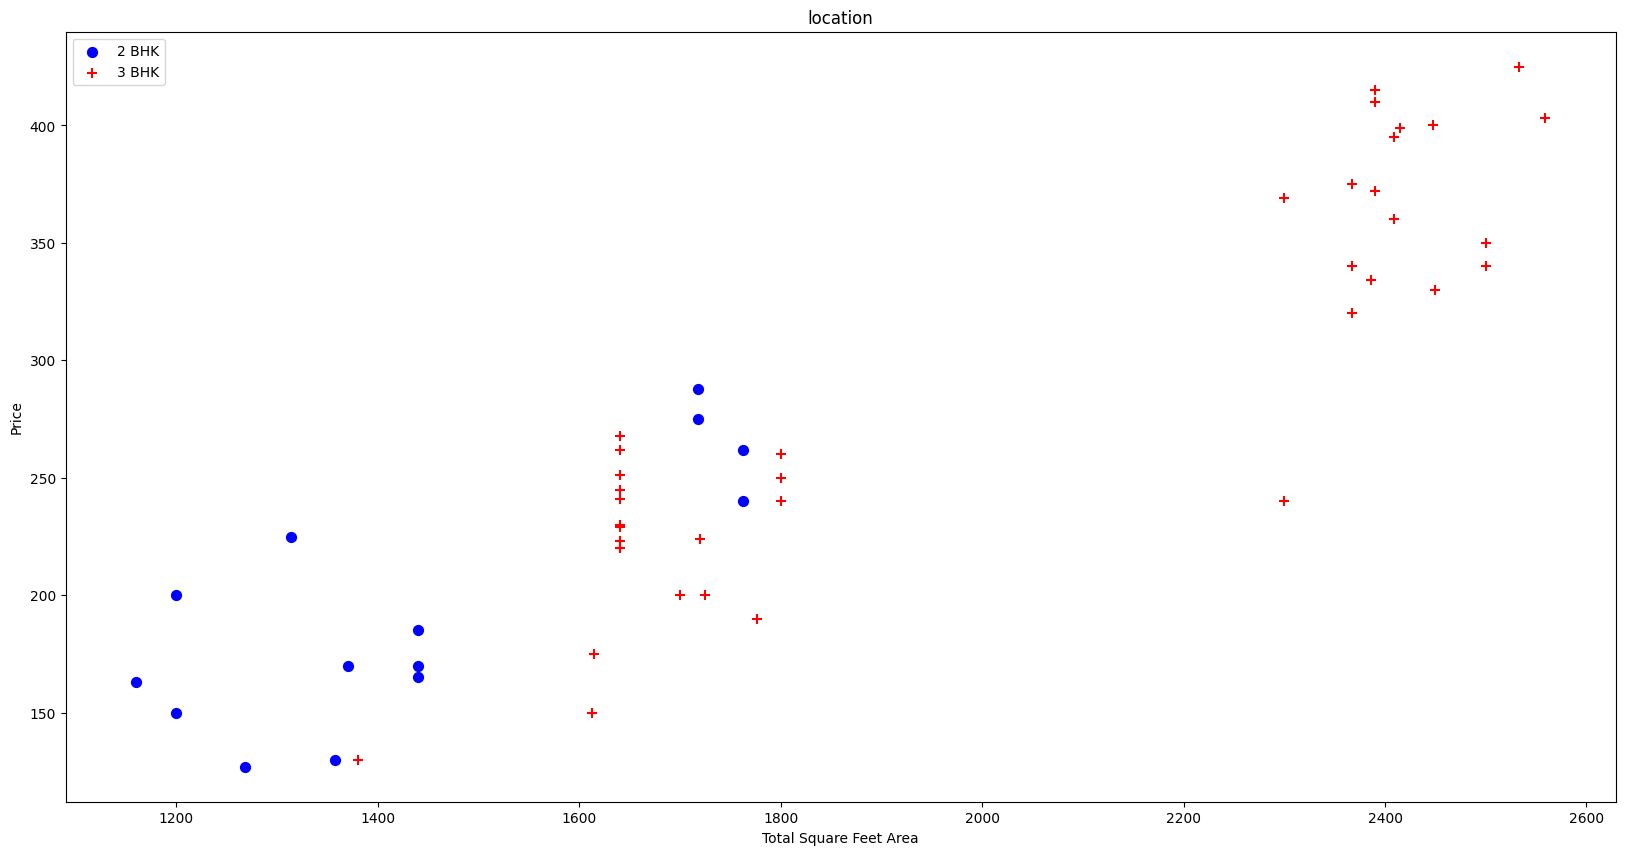

In [55]:
sactterplotfun(df6,'Rajaji Nagar')

In [56]:
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location , location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk , bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk] = {
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]
      }
      for bhk , bhk_df in location_df.groupby('bhk'):
        stats = bhk_stats.get(bhk-1)
        if stats and stats['count']>5:
          exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices,axis='index')

df7 = remove_bhk_outliers(df6)
df7.shape



(7342, 7)

In [57]:
def sactterplotfun(df,location):
  bhk2=df7[(df7.location==location) & (df7.bhk==2)]
  bhk3=df7[(df7.location==location) & (df7.bhk==3)]
  plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price,color='red',marker='+',label='3 BHK',s=50)
  plt.xlabel('Total Square Feet Area')
  plt.ylabel('Price')
  plt.title('location')
  plt.legend()

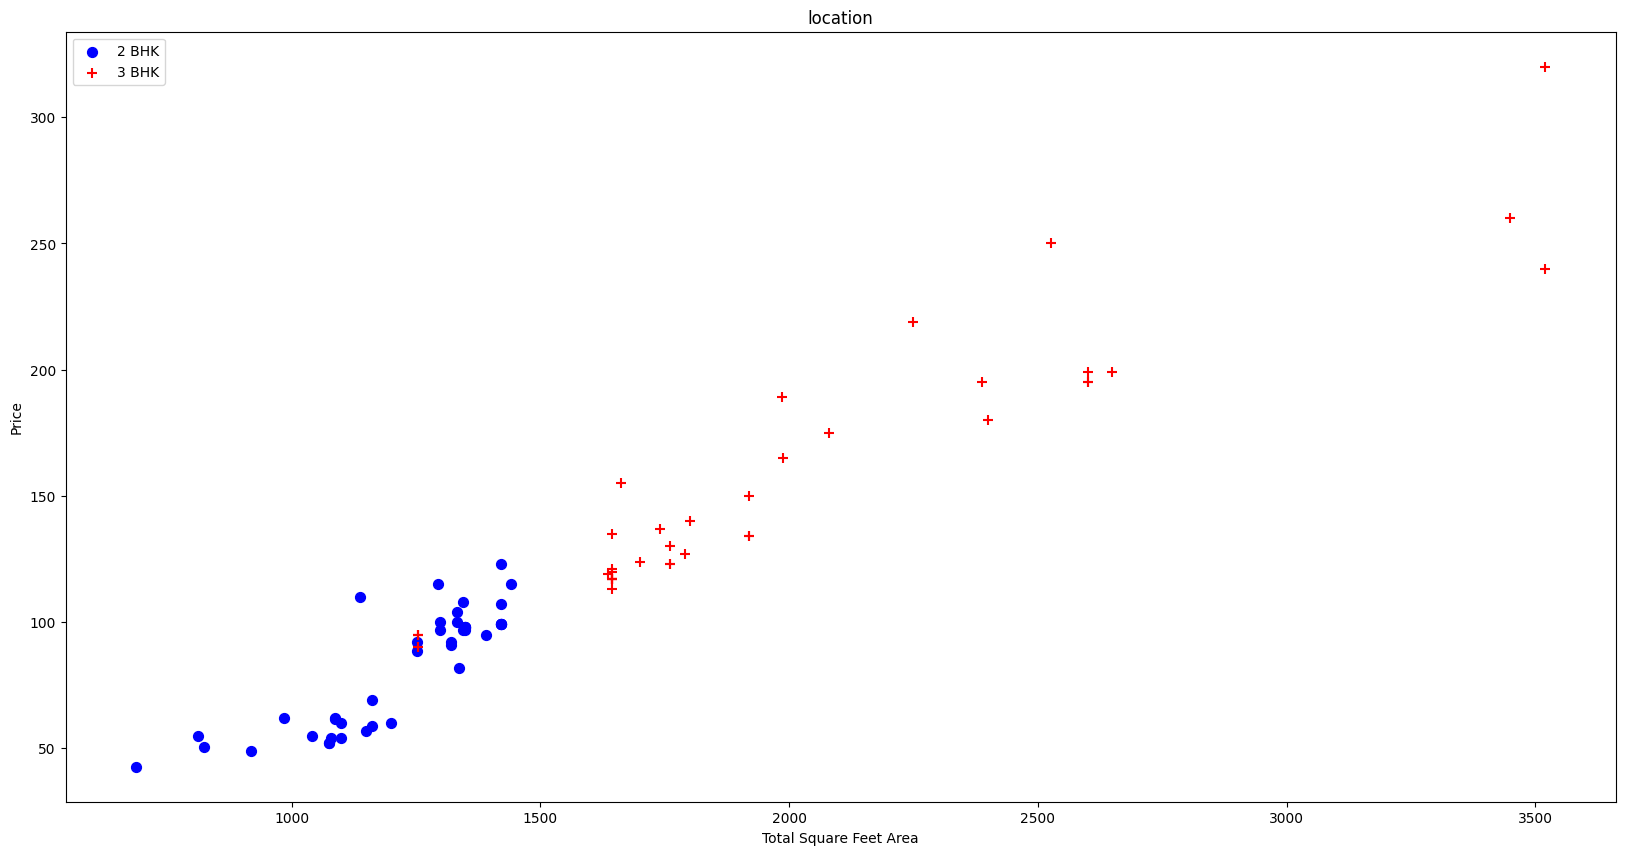

In [58]:
sactterplotfun(df7,'Hebbal')

Text(0, 0.5, 'count')

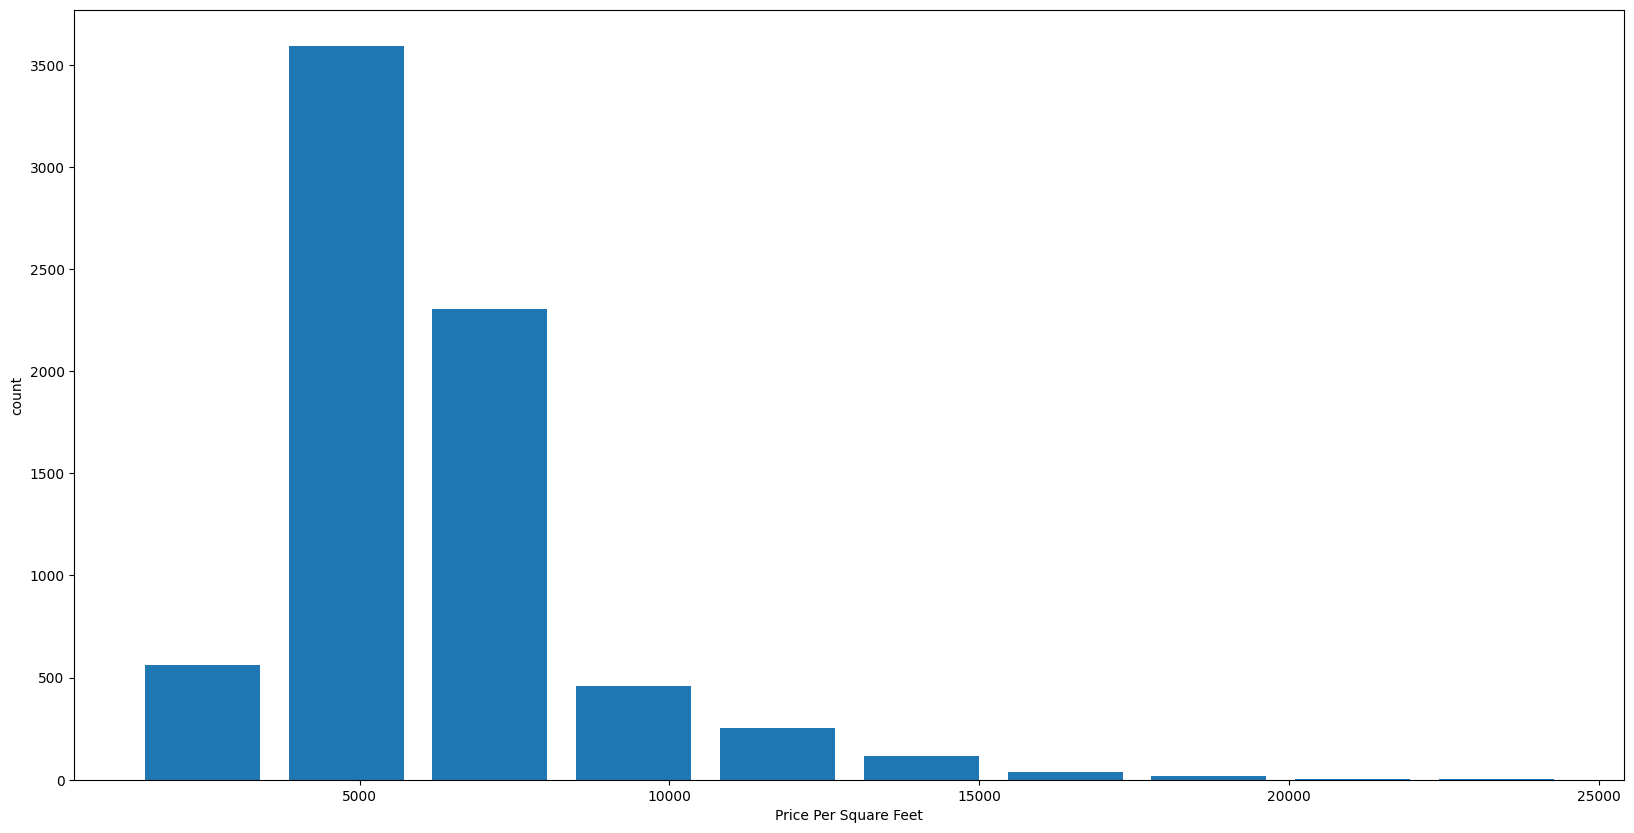

In [59]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel("count")


In [60]:
df7[df7.bath>10]

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
5271,Super built-up Area,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8481,Super built-up Area,other,12000.0,12.0,525.0,10,4375.000000
8570,Super built-up Area,other,10000.0,16.0,550.0,16,5500.000000
9309,Super built-up Area,other,6000.0,12.0,150.0,11,2500.000000
9641,Super built-up Area,other,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

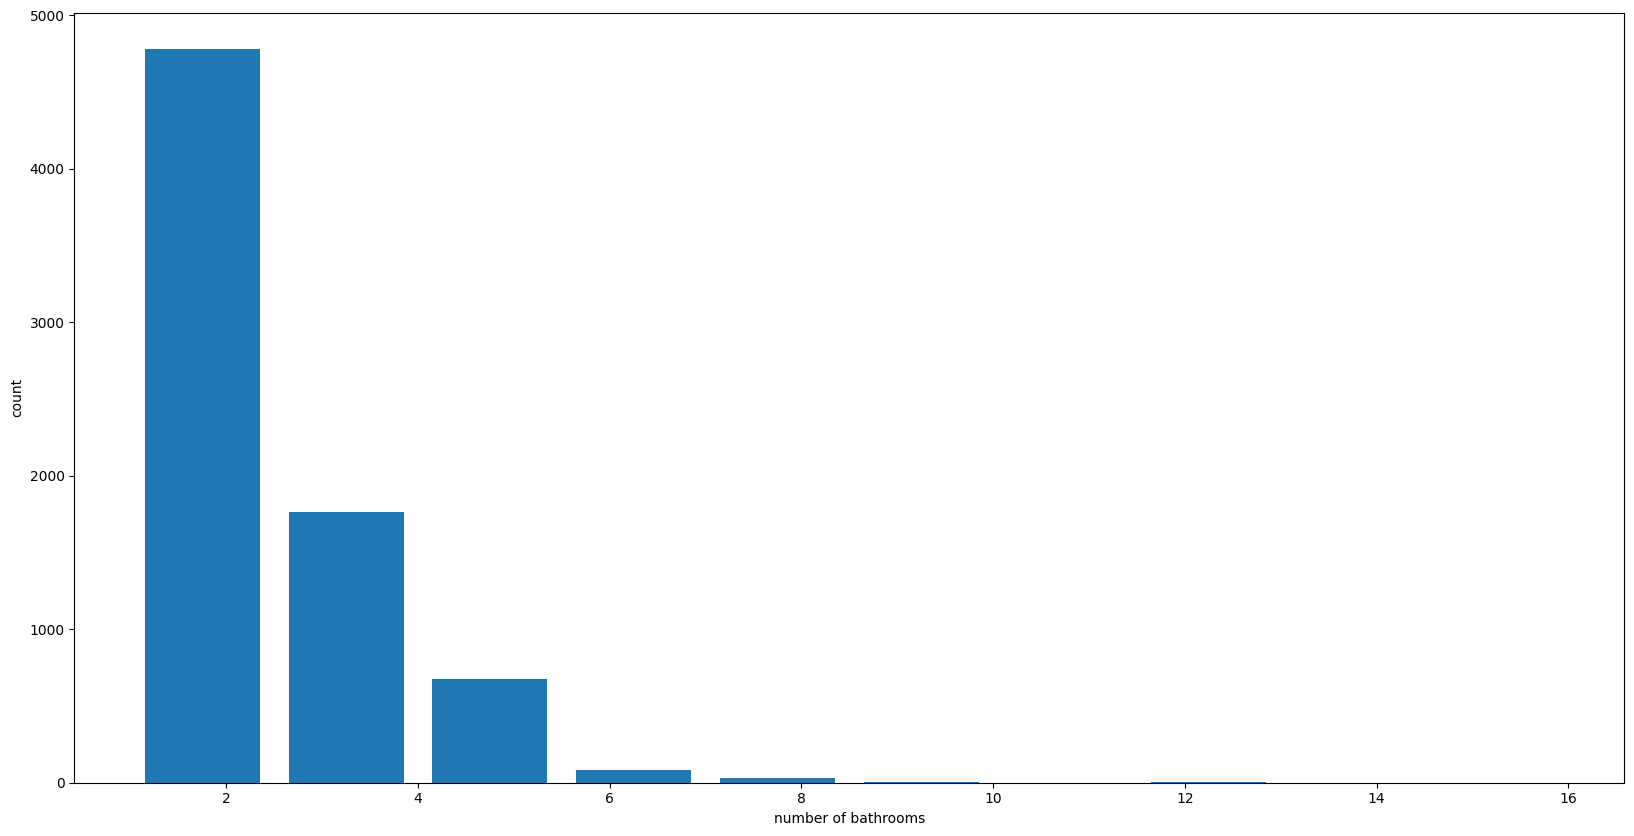

In [61]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("number of bathrooms")
plt.ylabel("count")

In [62]:
df8 = df7[df7.bath<df7.bhk+2]
df8.shape

(7264, 7)

In [63]:
df9 = df8.drop(['price_per_sqft','area_type'],axis='columns')
df9.head(3)

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2


In [64]:
dummies = pd.get_dummies(df9.location).astype(int)
dummies.head(3)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df10 = pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df11 = df10.drop('location',axis='columns')
df11.head(3)

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
df11.shape

(7264, 245)

In [68]:
x = df11.drop('price',axis='columns')
x.head(3)

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
y = df11.price
y.head()

1    40.0
2    83.0
3    40.0
4    65.0
5    43.0
Name: price, dtype: float64

In [71]:
!pip install scikit-learn

  Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.16.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl (8.7 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached scipy-1.16.3-cp313-cp313-win_amd64.whl (38.5 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ------------------

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [73]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [74]:
lr_clf.score(x_test,y_test)

0.7696224927820234

In [81]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.82622151, 0.81408431, 0.87757267, 0.84822717, 0.86091226])

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, LinearRegression # Ensure LinearRegression is imported
from sklearn.tree import DecisionTreeRegressor
def find_best_model_using_gridsearchcv(x,y):# gridsearch find best model with best model setting which they gives .
  algos = {
      'linear_regression':{
          'model':LinearRegression(),
          'params':{
              # The 'normalize' parameter is deprecated and removed in scikit-learn v1.0 and later.
              # If data normalization is needed, it should be applied as a preprocessing step.
          }
      },
      'lasso':{
          'model':Lasso(),
          'params':{
              'alpha':[1,2],
              'selection':['random','cyclic'] # use to not overfit the model.
           }
        },
      'decision_tree':{
          'model':DecisionTreeRegressor(),
          'params':{
              'criterion':['squared_error','friedman_mse'],# 'mse' is deprecated, use 'squared_error'
              'splitter':['best','random'] # How do I make decisions at each step?
          }
      }
  }
  scores = []
  cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)# condition for testing model
  for algo_name , config in algos.items(): # starting to test each model 1 by 1
    gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)# test with diff. samples
    gs.fit(x,y)
    scores.append({
        'model':algo_name,
        'best_score':gs.best_score_,
        'best_params':gs.best_params_
    })
  return pd.DataFrame(scores,columns=['model','best_score','best_params'])


In [83]:
find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.845404,{}
1,lasso,0.709511,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.696546,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [84]:
def predict_price(location,sqft,bath,bhk):
  loc_index = np.where(x.columns==location)[0][0] #give the index of that location .

  X = np.zeros(len(x.columns))
  X[0]=sqft
  X[1]=bath
  X[2]=bhk
  if loc_index >=0: # set index value to 1 .
    X[loc_index]=1
  return lr_clf.predict([X])[0]

In [85]:
predict_price('2nd Stage Nagarbhavi',1000,2,2)

C:\Users\piyus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(199.0406978907876)

In [86]:
predict_price('2nd Stage Nagarbhavi',3000,5,5)

C:\Users\piyus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(367.25966728150627)

# save the model

In [87]:
import pickle
with open('Bengaluru_House_Data.pkl','wb') as f:
  pickle.dump(lr_clf,f)

In [88]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))